In [1]:
#Cargamos las bibliotecas necesarias: 
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Ahora leeremos los archivos de datos, dandole una etiqueta a cada uno
df = pd.read_csv("sargento-salinidad-270218.csv", header=None, names=['N','Date','CHigh','Temp','SC','Sal'], skiprows=2, sep=',')
df.head()


,N,Date,CHigh,Temp,SC,Sal
0,1,02/04/2018 09:30:00,50782.6,17.53,59295.4,39.6728
1,2,02/04/2018 09:45:00,50617.2,17.33,59362.4,39.7235
2,3,02/04/2018 10:00:00,50646.3,17.23,59526.8,39.8482
3,4,02/04/2018 10:15:00,50772.9,17.17,59753.7,40.0203
4,5,02/04/2018 10:30:00,51007.8,17.14,60068.6,40.2595


In [3]:
gh = pd.read_csv("sargentoNA-270218.csv", header=None, names=['N','Date','AbsP','Temp','WL'], skiprows=2, sep=',')
gh.head()

,N,Date,AbsP,Temp,WL
0,1,02/04/2018 09:45:00,108.068,17.094,0.060
1,2,02/04/2018 10:00:00,107.815,16.903,0.035
2,3,02/04/2018 10:15:00,107.791,16.903,0.032
3,4,02/04/2018 10:30:00,107.791,16.903,0.032
4,5,02/04/2018 10:45:00,107.791,16.903,0.032


In [4]:
gh['Ndate'] = pd.to_datetime(gh['Date'], format=' %m/%d/%Y %H:%M:%S')
gh['month'] = gh['Ndate'].dt.month
gh.head()

,N,Date,AbsP,Temp,WL,Ndate,month
0,1,02/04/2018 09:45:00,108.068,17.094,0.060,2018-02-04 09:45:00,2
1,2,02/04/2018 10:00:00,107.815,16.903,0.035,2018-02-04 10:00:00,2
2,3,02/04/2018 10:15:00,107.791,16.903,0.032,2018-02-04 10:15:00,2
3,4,02/04/2018 10:30:00,107.791,16.903,0.032,2018-02-04 10:30:00,2
4,5,02/04/2018 10:45:00,107.791,16.903,0.032,2018-02-04 10:45:00,2


In [5]:
df['Ndate'] = pd.to_datetime(gh['Date'], format=' %m/%d/%Y %H:%M:%S')
df['month'] = df['Ndate'].dt.month
df.head()

,N,Date,CHigh,Temp,SC,Sal,Ndate,month
0,1,02/04/2018 09:30:00,50782.6,17.53,59295.4,39.6728,2018-02-04 09:45:00,2.0
1,2,02/04/2018 09:45:00,50617.2,17.33,59362.4,39.7235,2018-02-04 10:00:00,2.0
2,3,02/04/2018 10:00:00,50646.3,17.23,59526.8,39.8482,2018-02-04 10:15:00,2.0
3,4,02/04/2018 10:15:00,50772.9,17.17,59753.7,40.0203,2018-02-04 10:30:00,2.0
4,5,02/04/2018 10:30:00,51007.8,17.14,60068.6,40.2595,2018-02-04 10:45:00,2.0


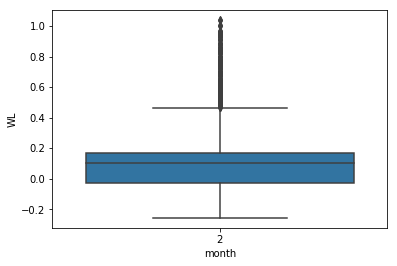

In [6]:
# graficar Boxplots por mes
# La grafica corresponde al nivel del agua

ax = sns.boxplot(x="month", y="WL", data=gh)
plt.show()

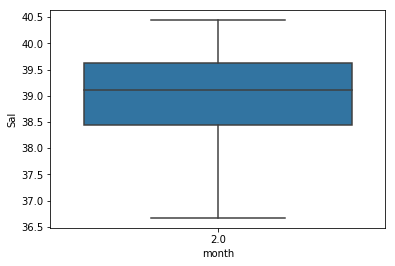

In [7]:
#La siguiente gráfica muestra los datos de la salinidad (ppt)
ax = sns.boxplot(x="month", y="Sal", data=df)
plt.show()

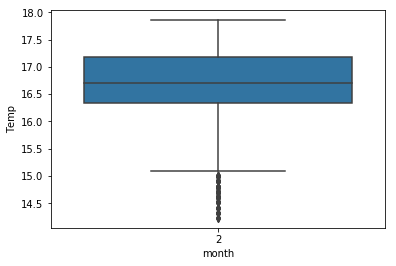

In [8]:
#Este tercer gráfico corresponde a la temperatura del agua (de los datos del archivo del nivel del agua)
ax = sns.boxplot(x="month", y="Temp", data=gh)
plt.show()

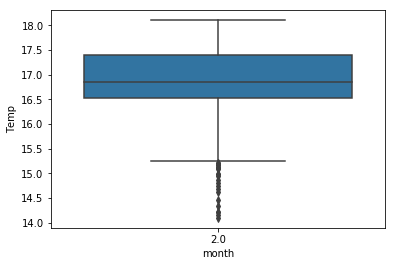

In [9]:
#Este cuarto gráfico corresponde a la temperatura del agua (de los datos del archivo de la salinidad)
ax = sns.boxplot(x="month", y="Temp", data=df)
plt.show()

In [10]:
gh.describe()

,N,AbsP,Temp,WL,month
count,2216.00000,2216.000000,2216.000000,2216.000000,2216.0
mean,1108.50000,108.472155,16.676223,0.100208,2.0
std,639.84842,2.170574,0.756794,0.215948,0.0
min,1.00000,104.878000,14.230000,-0.257000,2.0
25%,554.75000,107.199750,16.332000,-0.026000,2.0
50%,1108.50000,108.488000,16.713000,0.102000,2.0
75%,1662.25000,109.178000,17.189000,0.170000,2.0
max,2216.00000,117.899000,17.855000,1.038000,2.0


In [11]:
df.describe()

,N,CHigh,Temp,SC,Sal,month
count,2218.00000,2218.000000,2218.000000,2218.000000,2218.000000,2216.0
mean,1109.50000,49435.553336,16.902182,58526.761677,39.092089,2.0
std,640.42577,1147.713269,0.670626,922.110180,0.697061,0.0
min,1.00000,46569.900000,14.100000,55305.400000,36.669100,2.0
25%,555.25000,48410.500000,16.530000,57655.400000,38.433300,2.0
50%,1109.50000,49294.000000,16.850000,58559.300000,39.115650,2.0
75%,1663.75000,50068.200000,17.390000,59244.200000,39.634000,2.0
max,2218.00000,52095.300000,18.100000,60306.400000,40.440200,2.0


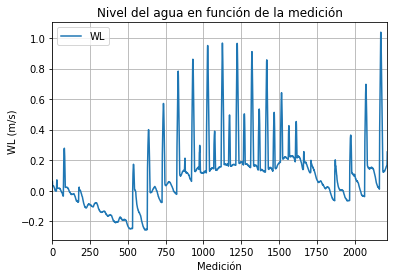

In [12]:
#Ahora por medio de matplot haremos gráficas independientes del nivel del agua, salinidad 
#y temperatura en función del tiempo, yengo en el orden indicado
ghj = gh[['N','WL']]
plt.figure(); ghj.plot(x='N'); plt.legend(loc='best')
plt.title("Nivel del agua en función de la medición")
plt.xlabel("Medición")
plt.ylabel("WL (m/s)")
plt.grid(True)
plt.show()

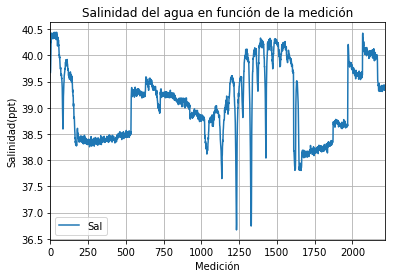

In [13]:
#Ahora la gráfica de la salinidad
dfj = df[['N','Sal']]
plt.figure(); dfj.plot(x='N'); plt.legend(loc='best')
plt.title("Salinidad del agua en función de la medición")
plt.xlabel("Medición")
plt.ylabel("Salinidad(ppt)")
plt.grid(True)
plt.show()

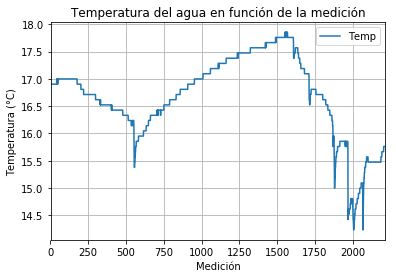

In [14]:
#Por último la gráfica de la temperatura del agua (usando los datos del archivo del nivel del agua)
ghk = gh[['N','Temp']]
plt.figure(); ghk.plot(x='N'); plt.legend(loc='best')
plt.title("Temperatura del agua en función de la medición")
plt.xlabel("Medición")
plt.ylabel("Temperatura (°C)")
plt.grid(True)
plt.show()

In [15]:
gh1 = pd.DataFrame(gh)
df1 = pd.DataFrame(df)

In [16]:
u = pd.concat([df1['Date'], df1['Sal'], gh1['WL'], gh1['Temp'], gh1['N']], axis=1, keys=['Date', 'Sal', 'WL', 'Temp', 'N']) 

In [17]:
u.head()

,Date,Sal,WL,Temp,N
0,02/04/2018 09:30:00,39.6728,0.060,17.094,1.0
1,02/04/2018 09:45:00,39.7235,0.035,16.903,2.0
2,02/04/2018 10:00:00,39.8482,0.032,16.903,3.0
3,02/04/2018 10:15:00,40.0203,0.032,16.903,4.0
4,02/04/2018 10:30:00,40.2595,0.032,16.903,5.0


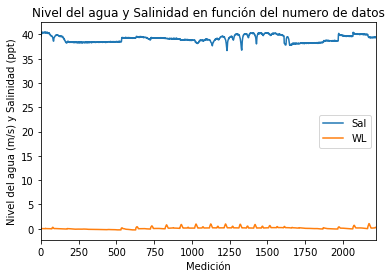

In [18]:
#Haremos la primera gráfica de dos variables, esta será del nivel del agua y la salinidad del agua en función del numero
#de datos
g1= u[['Sal','WL']]
plt.figure(); g1.plot()
plt.plot(x=u.N)
plt.title("Nivel del agua y Salinidad en función del numero de datos")
plt.xlabel("Medición")
plt.ylabel("Nivel del agua (m/s) y Salinidad (ppt)")
plt.show()

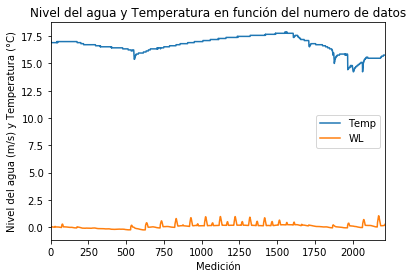

In [19]:
#Haremos la primera gráfica de dos variables, esta será del nivel del agua y la temperatura en función del numero 
#de datos
g2= u[['Temp','WL']]
plt.figure(); g2.plot()
plt.plot(x=u.N)
plt.title("Nivel del agua y Temperatura en función del numero de datos")
plt.xlabel("Medición")
plt.ylabel("Nivel del agua (m/s) y Temperatura (°C)")
plt.show()

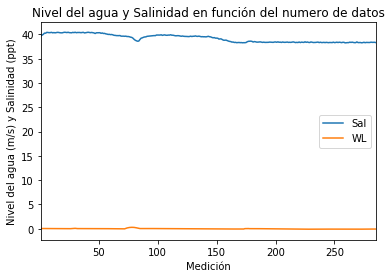

In [20]:
#Volveremos a hacer las dos gráficas anteriores, limitando el valor de x a 5 (dias de datos que corresponden 
#a una N de 285 aprox)
#Nivel de agua & salinidad
g1= u[['Sal','WL']]
plt.figure(); g1.plot()
plt.plot(x=u.N)
plt.xlim([1,285])
plt.title("Nivel del agua y Salinidad en función del numero de datos")
plt.xlabel("Medición")
plt.ylabel("Nivel del agua (m/s) y Salinidad (ppt)")
plt.show()

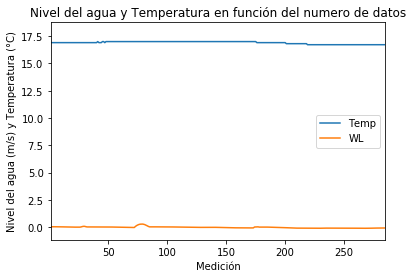

In [21]:
#Gráfica de nivel del agua y temperatura con limite en 5 (dias de datos)
g1= u[['Temp','WL']]
plt.figure(); g1.plot()
plt.plot(x=u.N)
plt.xlim([1,285])
plt.title("Nivel del agua y Temperatura en función del numero de datos")
plt.xlabel("Medición")
plt.ylabel("Nivel del agua (m/s) y Temperatura (°C)")
plt.show()

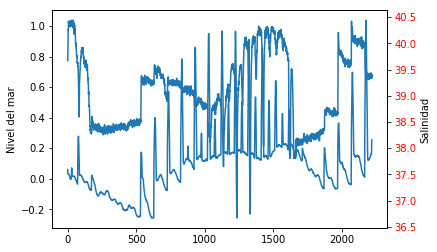

In [26]:
#La sección seis de las actividades a realizar  (Nivel agua y Salinidad)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(gh.N, gh.WL,'-')
ax1.set_ylabel(r"Nivel del mar")

ax2 = ax1.twinx()
ax2.plot(df.N, df.Sal, '-')
ax2.set_ylabel(r"Salinidad")
for tl in ax2.get_yticklabels():
    tl.set_color('r')

plt.show()

In [24]:
df.head()

,N,Date,CHigh,Temp,SC,Sal,Ndate,month
0,1,02/04/2018 09:30:00,50782.6,17.53,59295.4,39.6728,2018-02-04 09:45:00,2.0
1,2,02/04/2018 09:45:00,50617.2,17.33,59362.4,39.7235,2018-02-04 10:00:00,2.0
2,3,02/04/2018 10:00:00,50646.3,17.23,59526.8,39.8482,2018-02-04 10:15:00,2.0
3,4,02/04/2018 10:15:00,50772.9,17.17,59753.7,40.0203,2018-02-04 10:30:00,2.0
4,5,02/04/2018 10:30:00,51007.8,17.14,60068.6,40.2595,2018-02-04 10:45:00,2.0


In [25]:
gh.head()

,N,Date,AbsP,Temp,WL,Ndate,month
0,1,02/04/2018 09:45:00,108.068,17.094,0.060,2018-02-04 09:45:00,2
1,2,02/04/2018 10:00:00,107.815,16.903,0.035,2018-02-04 10:00:00,2
2,3,02/04/2018 10:15:00,107.791,16.903,0.032,2018-02-04 10:15:00,2
3,4,02/04/2018 10:30:00,107.791,16.903,0.032,2018-02-04 10:30:00,2
4,5,02/04/2018 10:45:00,107.791,16.903,0.032,2018-02-04 10:45:00,2


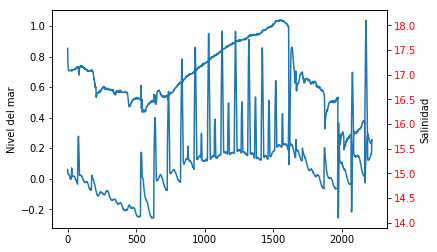

In [27]:
#Temperatura y nivel agua
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(gh.N, gh.WL,'-')
ax1.set_ylabel(r"Nivel del mar")

ax2 = ax1.twinx()
ax2.plot(df.N, df.Temp, '-')
ax2.set_ylabel(r"Salinidad")
for tl in ax2.get_yticklabels():
    tl.set_color('r')

plt.show()